In [3]:
# system
import sys
import os
from   importlib import reload

# maths
import numpy  as np
import xarray as xr

# plotting
import matplotlib.pyplot as pyp
import cartopy.crs       as ccrs
import cartopy.feature   as cfeature
import trajan            as ta

# parcels
import parcels

In [2]:
output = xr.open_zarr("/home/colin_beyers/lagrangian_drifts/simulations/particle_seeding/particle_seeding.zarr")
print(output)

<xarray.Dataset>
Dimensions:     (trajectory: 466, obs: 21)
Coordinates:
  * obs         (obs) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
  * trajectory  (trajectory) int64 0 1 2 3 4 5 6 ... 459 460 461 462 463 464 465
Data variables:
    distance    (trajectory, obs) float32 dask.array<chunksize=(466, 1), meta=np.ndarray>
    lat         (trajectory, obs) float32 dask.array<chunksize=(466, 1), meta=np.ndarray>
    lon         (trajectory, obs) float32 dask.array<chunksize=(466, 1), meta=np.ndarray>
    time        (trajectory, obs) datetime64[ns] dask.array<chunksize=(466, 1), meta=np.ndarray>
    z           (trajectory, obs) float32 dask.array<chunksize=(466, 1), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_kernels:        NewParticleAdvectionRK4TotalDistanceBoundaryCheck
    parcels_mesh:           spherical
    parcels_versio

/home/colin_beyers/miniconda3/envs/parcels_working/lib/python3.12/site-packages/shapely/creation.py:119: RuntimeWarning: invalid value encountered in linestrings
  return lib.linestrings(coords, out=out, **kwargs)
/home/colin_beyers/miniconda3/envs/parcels_working/lib/python3.12/site-packages/shapely/creation.py:119: RuntimeWarning: invalid value encountered in linestrings
  return lib.linestrings(coords, out=out, **kwargs)
/home/colin_beyers/miniconda3/envs/parcels_working/lib/python3.12/site-packages/shapely/creation.py:119: RuntimeWarning: invalid value encountered in linestrings
  return lib.linestrings(coords, out=out, **kwargs)
/home/colin_beyers/miniconda3/envs/parcels_working/lib/python3.12/site-packages/shapely/creation.py:119: RuntimeWarning: invalid value encountered in linestrings
  return lib.linestrings(coords, out=out, **kwargs)
/home/colin_beyers/miniconda3/envs/parcels_working/lib/python3.12/site-packages/shapely/creation.py:119: RuntimeWarning: invalid value encounter

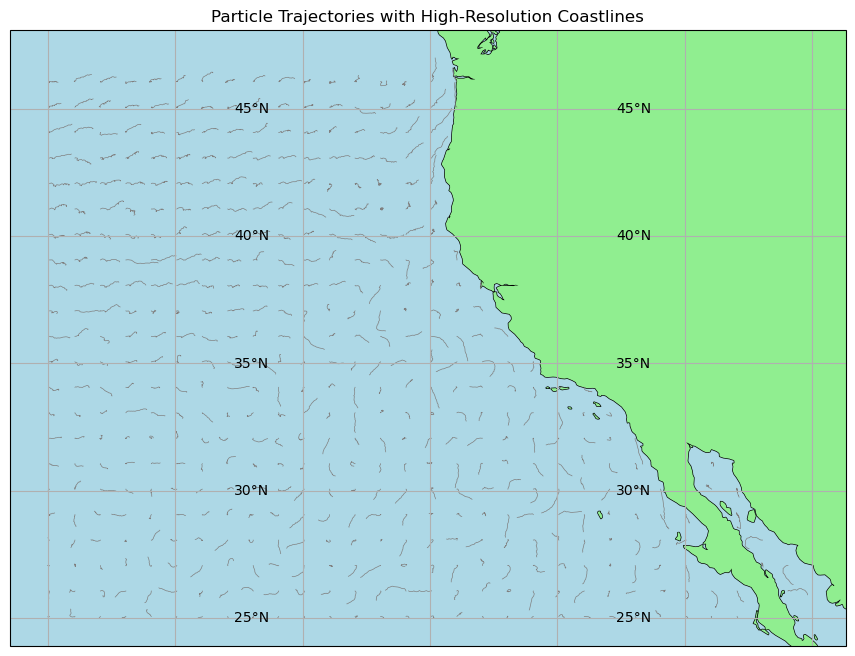

In [8]:
# Create a georeferenced plot with Cartopy
fig = pyp.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Add high-resolution coastlines and oceans
ax.coastlines(resolution='50m')  # You can use '10m' for even higher resolution
ax.add_feature(cfeature.OCEAN, zorder=1, facecolor='lightblue')
ax.add_feature(cfeature.LAND, zorder=2, facecolor='lightgreen')

# Plot the trajectories with a specific color
output.traj.plot(margin=2, color='grey', alpha=1, linewidth=0.5)  # Change 'blue' to your desired color

# Set title and labels
ax.set_title('Particle Trajectories with High-Resolution Coastlines')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add gridlines
ax.gridlines(draw_labels=True, dms=True, x_inline=True, y_inline=True)

# Show the plot
pyp.show()